# Social Networks Ads Classification using Naive Bayes
** we want to know whether a new user will buy the car or not.
    The data contains the following columns:
**Independent Variables
* 'User ID': User Identification No.
* 'Gender': Male | Female
* 'Age': Age of User.
* 'Estimated Salary': Salary of User.

**Dependent Variable
* 'Purchased': Whether user purchased a car or not.

In [42]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [43]:
# Library Version
print("NumPy : {}" .format(np.__version__))
print("Pandas : {}" .format(pd.__version__))
print("Matplotlib : {}" .format(matplotlib.__version__))
print("Seaborn : {}" .format(sns.__version__))

NumPy : 1.15.4
Pandas : 0.23.4
Matplotlib : 3.0.1
Seaborn : 0.9.0


In [44]:
# Import Dataset
social_data = pd.read_csv('Social_Network_Ads.csv')

In [45]:
# Dataset Columns
social_data.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [46]:
# Dataset Metdata
social_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.7+ KB


In [47]:
social_data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


# Data Preprocessing

In [53]:
# Predictors - Age, Estimated Salary
X = social_data.iloc[:, [2, 3]].values

In [55]:
# Target Variables - Purchased
y = social_data.iloc[:, 4].values

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
# Split Data for Cross Validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

In [58]:
from sklearn.preprocessing import StandardScaler

In [59]:
scaler = StandardScaler()

In [60]:
# Standardized Scaling to Variables
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


# Naive Bayes Classification

In [61]:
from sklearn.naive_bayes import GaussianNB

In [62]:
classifier = GaussianNB()

In [63]:
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

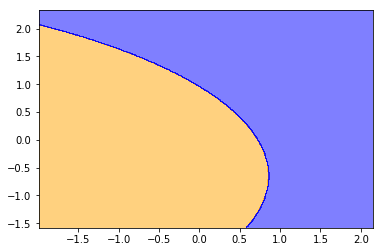

In [65]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
 
aranged_ages = np.arange(start = X_set[:,0].min(), stop = X_set[:,0].max(), step = 0.01)
aranged_salaries = np.arange(start = X_set[:,1].min(), stop = X_set[:,1].max(), step = 0.01)
 
X1, X2 = np.meshgrid(aranged_ages, aranged_salaries)

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),alpha = 0.5, cmap = ListedColormap(('orange', 'blue')))

In [66]:
predictions = classifier.predict(X_test)

In [67]:
from sklearn.metrics import confusion_matrix, classification_report

In [68]:
# Confusion Matrix
cm = confusion_matrix( y_test, predictions)
cm

array([[65,  3],
       [ 7, 25]])

In [72]:
# Classification Report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        68
           1       0.89      0.78      0.83        32

   micro avg       0.90      0.90      0.90       100
   macro avg       0.90      0.87      0.88       100
weighted avg       0.90      0.90      0.90       100



In [77]:
# Accuracy
accuracy = (cm[0][0] + cm[1][1]) / (cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1])
accuracy = accuracy * 100
print("Model Accuracy (%):" ,accuracy)

Model Accuracy (%): 90.0


# Ploting Test Set

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


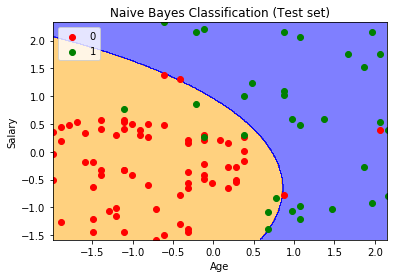

In [71]:
X_set, y_set = X_test, y_test
 
aranged_ages = np.arange(start = X_set[:,0].min(), stop = X_set[:,0].max(), step = 0.01)
aranged_salaries = np.arange(start = X_set[:,1].min(), stop = X_set[:,1].max(), step = 0.01)
 
X1, X2 = np.meshgrid(aranged_ages, aranged_salaries)

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),alpha = 0.5, cmap = ListedColormap(('orange', 'blue')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()
plt.show()